## 🎯 Objective

This notebook visualizes how quantum gates impact qubit states on the Bloch sphere.

1. **Phase Shift with Z Gate**  
   - Demonstrates how the `H-Z-H` circuit alters the qubit’s **phase** without changing measurement outcomes.
   - Visualized as a rotation around the Z-axis on the Bloch sphere.

2. **Effect of Entanglement**  
   - Shows that an **entangled qubit** loses its individual pure state.
   - The Bloch sphere collapses to the center, indicating a **mixed state**.

Together, these examples illustrate the geometric and physical effects of phase shifts and entanglement in quantum systems.


In [133]:
from qiskit import QuantumCircuit,transpile
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit_aer import Aer
%matplotlib inline
import math

In [17]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

## ⚙️ Selecting Simulators

We use two simulators in this notebook:

- `statevector_simulator`: to obtain the quantum state vector for visualization.
- `qasm_simulator`: to simulate measurements and get probability distributions.


In [123]:
qasm_simulator = Aer.get_backend('qasm_simulator')
statevector_simulator = Aer.get_backend('statevector_simulator')

## 🔁 Simulator Execution Function

This function `run_on_simulator()`:
- Takes a quantum circuit as input.
- Runs it on the `statevector_simulator` to obtain the state vector.
- Adds measurement and runs it on the `qasm_simulator` to get classical outcomes.
- Returns both the statevector and the measurement counts.


In [292]:
def run_on_simulator(circuit):
    circuit_copy = circuit.copy()
    circuit_copy.save_statevector()
    
    # Run on statevector simulator
    statevec_transpile = transpile(circuit,statevector_simulator)
    statevec_job = statevector_simulator.run(statevec_transpile)
    result = statevec_job.result()
    statevec = result.get_statevector()
    
     # Add measurement
    num_qubit = circuit.num_qubits
    circuit.measure([i for i in range(num_qubit)],[ i for i in range(num_qubit)])

     # Run on QASM simulator
    qasm_transpile = transpile(circuit, qasm_simulator)
    qasm_job = qasm_simulator.run(qasm_transpile)
    qasm_result = qasm_job.result()
    counts = qasm_result.get_counts()
    
    return statevec,counts

## 🌀 Z Gate Phase Effect: H-Z-H Circuit

This circuit applies a Z gate sandwiched between two Hadamard gates:

- `H-Z-H` transforms `|0⟩` → `|1⟩`, but with a **relative phase**.
- The Bloch sphere shows the **Z-axis rotation**, while the measurement outcomes remain unaffected (i.e., still |1⟩).


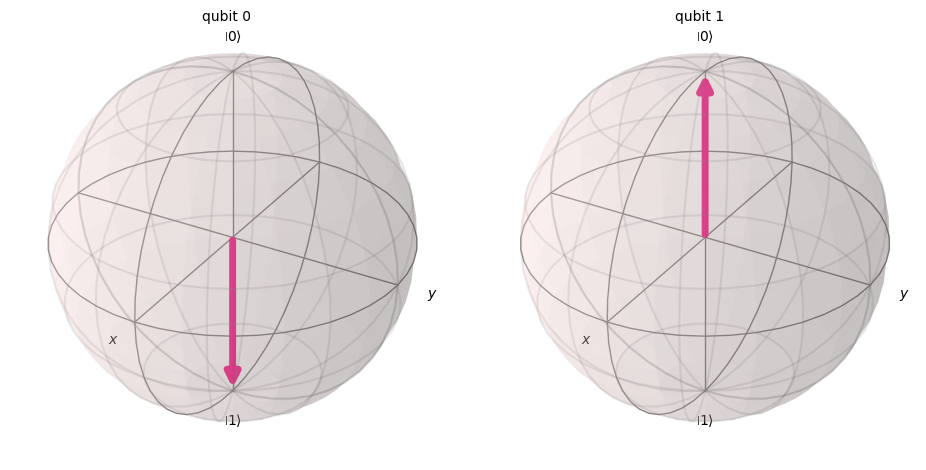

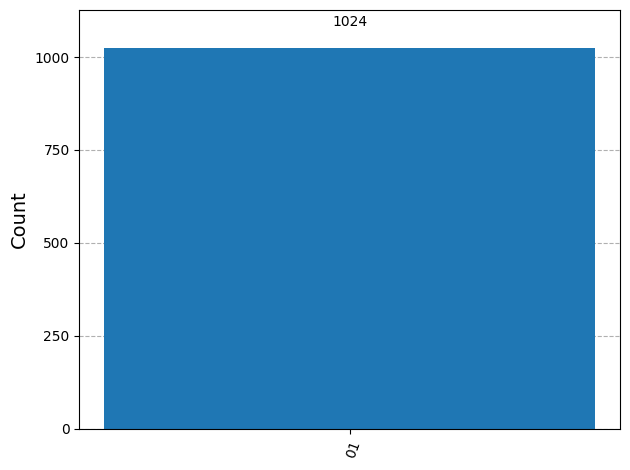

In [306]:
# Create and run the circuit
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.z(0)
circuit.h(0)
statevec,counts = run_on_simulator(circuit)

# Visualizations
bloch_sphere = plot_bloch_multivector(statevec)
bloch_sphere.savefig('bloch_sphere.png')
histgram_diagram = plot_histogram(counts)
plt.savefig("bloch_sphere.png", dpi=300, bbox_inches='tight')
plt.show()

## 🔗 Entanglement and Bloch Sphere Collapse

Now we entangle two qubits using:

- `H` on qubit 0
- `CX` from qubit 0 → qubit 1

This creates a **Bell state** (|00⟩ + |11⟩)/√2.

The Bloch sphere of **either qubit alone** collapses to the **center**, indicating a **mixed state** — showing that **entanglement destroys individual qubit purity**.


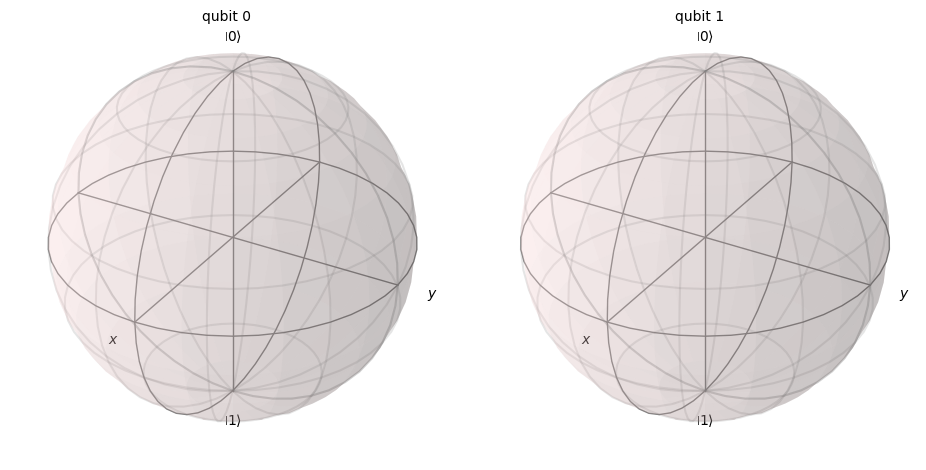

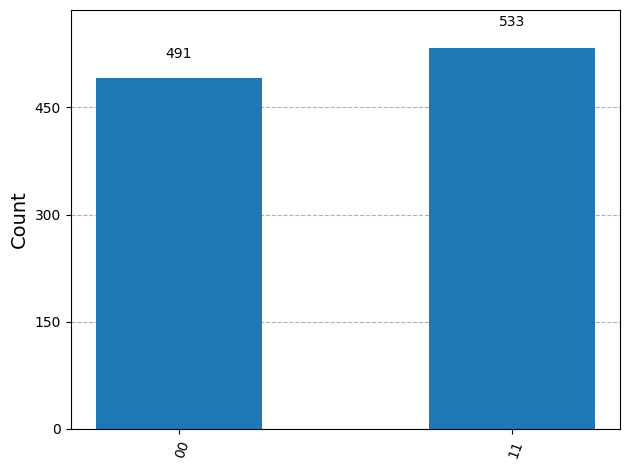

In [302]:
# New entangled circuit
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)

# Run the simulation
statevec, count = run_on_simulator(circuit)

# Visualizations
bloch_sphere = plot_bloch_multivector(statevec)
bloch_sphere.savefig('bloch_sphere_entanglemet')
histogram = plot_histogram(count)
plt.savefig()